<a href="https://colab.research.google.com/github/saket-20/Covid_Fake_News/blob/main/Covid_Fake_Tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
URL1="https://raw.githubusercontent.com/saket-20/Data/main/Constraint_Test.csv"
URL2="https://raw.githubusercontent.com/saket-20/Data/main/Constraint_Train.csv"
URL3="https://raw.githubusercontent.com/saket-20/Covid_Fake_News/main/Constraint_Val.csv"
URL4="https://raw.githubusercontent.com/saket-20/Data/main/english_test_with_labels.csv"
#18thoct

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from google.colab import drive
plt.rcParams["figure.figsize"]=15,15
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
train=pd.read_csv(URL2,delimiter=",") 

In [ ]:
train

,id,tweet,label
0,1,The CDC currently reports 99031 deaths. In gen...,real
1,2,States reported 1121 deaths a small rise from ...,real
2,3,Politically Correct Woman (Almost) Uses Pandem...,fake
3,4,#IndiaFightsCorona: We have 1524 #COVID testin...,real
4,5,Populous states can generate large case counts...,real
...,...,...,...
6415,6416,A tiger tested positive for COVID-19 please st...,fake
6416,6417,???Autopsies prove that COVID-19 is??� a blood...,fake
6417,6418,_A post claims a COVID-19 vaccine has already ...,fake
6418,6419,Aamir Khan Donate 250 Cr. In PM Relief Cares Fund,fake


In [ ]:
train['label'].replace({'real': 1, 'fake': 0},inplace=True)

In [ ]:
train['label'].value_counts(normalize=True)#roughly equal labels with 0 and 1

1    0.523364
0    0.476636
Name: label, dtype: float64

In [ ]:
test=pd.read_csv(URL1,delimiter=",") 

In [ ]:
test

,id,tweet
0,1,Our daily update is published. States reported...
1,2,Alfalfa is the only cure for COVID-19.
2,3,President Trump Asked What He Would Do If He W...
3,4,States reported 630 deaths. We are still seein...
4,5,This is the sixth time a global health emergen...
...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...


In [ ]:
test_with_label=pd.read_csv(URL4,",")

In [ ]:
test_with_label

,id,tweet,label
0,1,Our daily update is published. States reported...,real
1,2,Alfalfa is the only cure for COVID-19.,fake
2,3,President Trump Asked What He Would Do If He W...,fake
3,4,States reported 630 deaths. We are still seein...,real
4,5,This is the sixth time a global health emergen...,real
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,real
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,fake
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,real
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,real


In [ ]:
test_with_label['label'].replace({'real': 1, 'fake': 0},inplace=True)

In [ ]:
test_with_label

,id,tweet,label
0,1,Our daily update is published. States reported...,1
1,2,Alfalfa is the only cure for COVID-19.,0
2,3,President Trump Asked What He Would Do If He W...,0
3,4,States reported 630 deaths. We are still seein...,1
4,5,This is the sixth time a global health emergen...,1
...,...,...,...
2135,2136,#CoronaVirusUpdates: State-wise details of Tot...,1
2136,2137,Tonight 12(midnight) onwards Disaster Manageme...,0
2137,2138,296 new cases of #COVID19Nigeria; Plateau-85 E...,1
2138,2139,RT @CDCemergency: #DYK? @CDCgov’s One-Stop Sho...,1


In [ ]:
train["tweet"].describe()

count                                                  6420
unique                                                 6420
top       Yesterday our laboratories completed 626 tests...
freq                                                      1
Name: tweet, dtype: object

In [ ]:

lemmatizer = nltk.stem.WordNetLemmatizer()

In [ ]:
def clean(string1):
    string1=string1['tweet'].lower()
    string1=string1.replace("@","")
    string1=string1.replace("#","")
    string1=re.sub(r"http\S+", "",string1)
    L=[lemmatizer.lemmatize(i) for i in string1.split()]
    string1=" ".join((L))
    return string1

In [ ]:
def clean_string(string1):
    string1=string1.lower()
    string1=string1.replace("@","")
    string1=string1.replace("#","")
    string1=re.sub(r"http\S+", "",string1)
    L=[lemmatizer.lemmatize(i) for i in string1.split()]
    string1=" ".join((L))
    return string1

In [ ]:
train['tweet'] = train.apply(clean,axis=1)

In [ ]:

train

,id,tweet,label
0,1,the cdc currently report 99031 deaths. in gene...,1
1,2,state reported 1121 death a small rise from la...,1
2,3,politically correct woman (almost) us pandemic...,0
3,4,indiafightscorona: we have 1524 covid testing ...,1
4,5,populous state can generate large case count b...,1
...,...,...,...
6415,6416,a tiger tested positive for covid-19 please st...,0
6416,6417,???autopsies prove that covid-19 is??� a blood...,0
6417,6418,_a post claim a covid-19 vaccine ha already be...,0
6418,6419,aamir khan donate 250 cr. in pm relief care fund,0


In [ ]:
test_with_label['tweet'] = test_with_label.apply(clean,axis=1)

In [ ]:
test_with_label

,id,tweet,label
0,1,our daily update is published. state reported ...,1
1,2,alfalfa is the only cure for covid-19.,0
2,3,president trump asked what he would do if he w...,0
3,4,state reported 630 deaths. we are still seeing...,1
4,5,this is the sixth time a global health emergen...,1
...,...,...,...
2135,2136,coronavirusupdates: state-wise detail of total...,1
2136,2137,tonight 12(midnight) onwards disaster manageme...,0
2137,2138,296 new case of covid19nigeria; plateau-85 enu...,1
2138,2139,rt cdcemergency: dyk? cdcgov’s one-stop shop f...,1


In [ ]:
text=" ".join(l for l in train.tweet)#[1] check

In [ ]:
train.tweet

0       the cdc currently report 99031 deaths. in gene...
1       state reported 1121 death a small rise from la...
2       politically correct woman (almost) us pandemic...
3       indiafightscorona: we have 1524 covid testing ...
4       populous state can generate large case count b...
                              ...                        
6415    a tiger tested positive for covid-19 please st...
6416    ???autopsies prove that covid-19 is??� a blood...
6417    _a post claim a covid-19 vaccine ha already be...
6418     aamir khan donate 250 cr. in pm relief care fund
6419    it ha been 93 day since the last case of covid...
Name: tweet, Length: 6420, dtype: object

In [ ]:
nltk_stop_words = set(nltk.corpus.stopwords.words('english'))

In [ ]:
word_cloud = WordCloud(collocations = False,stopwords=nltk_stop_words).generate(text)

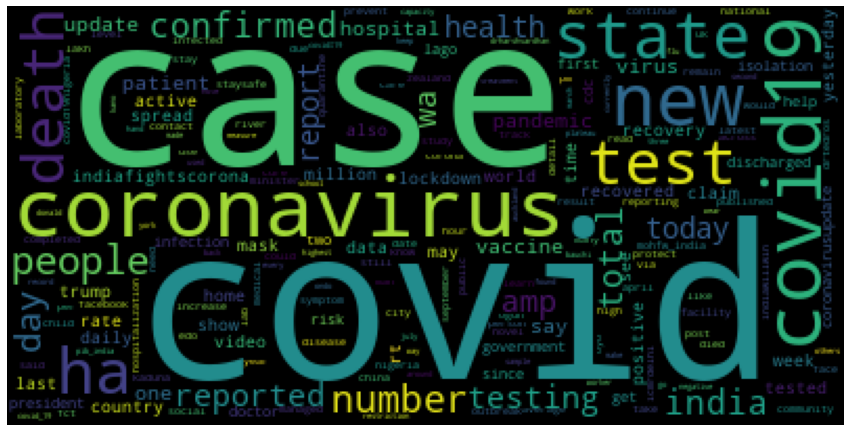

In [ ]:
plt.axis("off")
plt.imshow(word_cloud)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [ ]:
Vectorizer=TfidfVectorizer()

In [ ]:
X=Vectorizer.fit_transform(train["tweet"])
X_test=Vectorizer.transform(test_with_label["tweet"])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model=MultinomialNB()

In [ ]:
model.fit(X,train['label'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
model.score(X_test, test_with_label['label'])

0.9079439252336449

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X,train['label'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

model.score(X_test, test_with_label['label'])

0.9149532710280374

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier

In [ ]:
PAC=PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=2e-3)

In [ ]:
PAC.fit(X,train['label'])

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=0, shuffle=True,
                            tol=0.002, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [ ]:
PAC.score(X_test, test_with_label['label'])

0.9289719626168225

In [ ]:

from sklearn.svm import SVC

In [ ]:
model=SVC()

In [ ]:
model.fit(X,train['label'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model.score(X_test, test_with_label['label'])

0.930373831775701

In [ ]:
from sklearn.svm import LinearSVC

In [ ]:
model=LinearSVC()

In [ ]:
model.fit(X,train['label'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [ ]:
model.score(X_test, test_with_label['label'])

0.9345794392523364

In [ ]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf','linear','poly']} 

In [ ]:
from sklearn.model_selection import GridSearchCV


In [ ]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=5)

In [ ]:
grid.fit(X,train['label'])

In [ ]:
grid.best_params_

In [ ]:
grid.score(X_test, test_with_label['label'])

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
predictions = grid.predict(X_test)

In [ ]:
print(confusion_matrix(test_with_label['label'],predictions))

In [ ]:
print(classification_report(test_with_label['label'],predictions))

In [ ]:
pred=PAC.predict(X_test)

In [ ]:
confusion_matrix(test_with_label['label'],pred)

array([[ 947,   73],
       [  79, 1041]])

In [ ]:
print(classification_report(test_with_label['label'],pred))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93      1020
           1       0.93      0.93      0.93      1120

    accuracy                           0.93      2140
   macro avg       0.93      0.93      0.93      2140
weighted avg       0.93      0.93      0.93      2140



In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import gensim

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [ ]:
tk=Tokenizer()

In [ ]:
valid=pd.read_csv(URL3,delimiter=",")
all_text=pd.concat([train['tweet'],valid['tweet']])

In [ ]:
tk.fit_on_texts(all_text)
tk.word_index

{'the': 1,
 'of': 2,
 'to': 3,
 'in': 4,
 'a': 5,
 'and': 6,
 'covid': 7,
 'is': 8,
 '19': 9,
 'for': 10,
 'coronavirus': 11,
 'are': 12,
 'covid19': 13,
 'case': 14,
 'that': 15,
 'on': 16,
 't': 17,
 'co': 18,
 'from': 19,
 'https': 20,
 'new': 21,
 'have': 22,
 'with': 23,
 'we': 24,
 'at': 25,
 'this': 26,
 'more': 27,
 'state': 28,
 'people': 29,
 'ha': 30,
 'test': 31,
 'it': 32,
 'be': 33,
 'by': 34,
 'our': 35,
 'number': 36,
 'india': 37,
 'not': 38,
 '1': 39,
 'been': 40,
 'cases': 41,
 'there': 42,
 '2': 43,
 'death': 44,
 'total': 45,
 'who': 46,
 'confirmed': 47,
 'reported': 48,
 'you': 49,
 'will': 50,
 'amp': 51,
 'can': 52,
 'testing': 53,
 'day': 54,
 'than': 55,
 'all': 56,
 'now': 57,
 'health': 58,
 '3': 59,
 'or': 60,
 'today': 61,
 'an': 62,
 'but': 63,
 'hospital': 64,
 'report': 65,
 'wa': 66,
 'they': 67,
 'one': 68,
 'no': 69,
 'if': 70,
 'vaccine': 71,
 'your': 72,
 'indiafightscorona': 73,
 'virus': 74,
 'about': 75,
 'up': 76,
 'pandemic': 77,
 'which': 78

In [ ]:
sq=tk.texts_to_sequences(train['tweet'])
len(train.iloc[0]['tweet'].split())
train.iloc[0]['tweet']

'the cdc currently report 99031 deaths. in general the discrepancy in death count between different source are small and explicable. the death toll stand at roughly 100000 people today.'

In [ ]:
len(sq[0])

29

In [ ]:
sq

[[1,
  153,
  299,
  65,
  8375,
  82,
  4,
  522,
  1,
  4646,
  4,
  44,
  625,
  277,
  528,
  573,
  12,
  824,
  6,
  8376,
  1,
  44,
  731,
  591,
  25,
  1786,
  1018,
  29,
  61],
 [28,
  48,
  8377,
  44,
  5,
  824,
  444,
  19,
  105,
  1086,
  3063,
  28,
  48,
  5891,
  2,
  173,
  82],
 [5892, 1530, 359, 603, 311, 77, 5, 2516, 38, 3, 8378, 2169, 1909, 11, 1057],
 [73,
  24,
  22,
  8379,
  7,
  53,
  278,
  4,
  37,
  6,
  5,
  16,
  3064,
  313,
  94,
  5893,
  31,
  22,
  40,
  547,
  2331,
  1910,
  234,
  189,
  221],
 [5894,
  28,
  52,
  4647,
  529,
  14,
  625,
  63,
  70,
  49,
  530,
  25,
  1,
  21,
  14,
  168,
  120,
  61,
  154,
  2332,
  28,
  12,
  592,
  27,
  14,
  168,
  120,
  55,
  459,
  60,
  548,
  3439,
  4648,
  3440,
  1302,
  3441,
  1531,
  1787,
  3442,
  6,
  4649],
 [7,
  489,
  57,
  279,
  16,
  199,
  351,
  227,
  4,
  1911,
  23,
  7,
  9,
  8,
  1611,
  39,
  190,
  136,
  29,
  83,
  115,
  15,
  1,
  187,
  1239,
  85,
  30,
  1532

In [ ]:
max_length=35

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
data = pad_sequences(sq, maxlen=max_length)

In [ ]:
data.shape

(6420, 35)

In [ ]:
wordembeddings = gensim.models.KeyedVectors.load_word2vec_format('drive/My Drive/GoogleNews-vectors-negative300.bin.gz', binary=True)#

In [ ]:
unique_words = len(tk.word_index)

In [ ]:
total_words = unique_words + 1
print(total_words)

19443


In [ ]:
skipped_words = 0
embedding_dim = 300  

In [ ]:
embedding_matrix = np.zeros((total_words, embedding_dim))

In [ ]:
for word, index in tk.word_index.items():
  try:
    embedding_vector = wordembeddings[word]
  except:
    skipped_words = skipped_words+1
    pass
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector
print("Embeddings Matrix shape : ",embedding_matrix.shape)

Embeddings Matrix shape :  (19443, 300)


In [ ]:

from tensorflow.keras.layers import *
#create the embedding layer
embedding_layer = Embedding(total_words, embedding_dim, weights=[embedding_matrix], input_length=max_length, trainable=False)


In [ ]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
# define model
model = Sequential()
model.add(embedding_layer)
model.add(SimpleRNN(128,activation='relu',return_sequences= True))
model.add(SimpleRNN(256,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 35, 300)           5832900   
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 35, 128)           54912     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 256)               98560     
_________________________________________________________________
dense (Dense)                (None, 1)                 257       
Total params: 5,986,629
Trainable params: 153,729
Non-trainable params: 5,832,900
_________________________________________________________________
None


In [ ]:
from tensorflow.keras.optimizers import *
opt = SGD(learning_rate=0.01,decay=1e-6)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=['accuracy'])
model.fit(data,train['label'],validation_split=0.1, epochs=20, verbose=1)

Epoch 1/20
181/181 [==============================] - 44s 232ms/step - loss: 0.1559 - accuracy: 0.9770 - val_loss: 0.4326 - val_accuracy: 0.9283
Epoch 2/20
181/181 [==============================] - 52s 289ms/step - loss: 0.1028 - accuracy: 0.9772 - val_loss: 0.2870 - val_accuracy: 0.9221
Epoch 3/20
181/181 [==============================] - 59s 325ms/step - loss: 0.0754 - accuracy: 0.9772 - val_loss: 0.2307 - val_accuracy: 0.9221
Epoch 4/20
181/181 [==============================] - 55s 302ms/step - loss: 0.0708 - accuracy: 0.9772 - val_loss: 0.2200 - val_accuracy: 0.9221
Epoch 5/20
181/181 [==============================] - 52s 284ms/step - loss: 0.0703 - accuracy: 0.9773 - val_loss: 0.2226 - val_accuracy: 0.9221
Epoch 6/20
181/181 [==============================] - 56s 308ms/step - loss: 0.0700 - accuracy: 0.9778 - val_loss: 0.2235 - val_accuracy: 0.9221
Epoch 7/20
181/181 [==============================] - 53s 290ms/step - loss: 0.0694 - accuracy: 0.9778 - val_loss: 0.2162 - val_ac

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(pred,test_with_label['label']))

In [ ]:
file=open('drive/My Drive/wiki-news-300d-1M.vec','r')

In [ ]:
dict1={}#for storing embeddings by word in an organized way
for line in file:
  L=line.split()
  dict1[L[0]]=np.array(L[1:],dtype='float32')

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 9843789221520371202]

In [ ]:
#for line in file:
 # vec_dim=len(line.split())
  #break
vec_dim=300

In [ ]:
dict1['ELEPHANT']

array([-0.0388, -0.0591, -0.0804, -0.0093, -0.0819,  0.0458, -0.0214,
       -0.0029,  0.0249,  0.0312,  0.0492,  0.0522, -0.0582, -0.1274,
       -0.0131, -0.0092, -0.0058,  0.1784,  0.0506, -0.1155, -0.0062,
       -0.1894, -0.0373, -0.0166,  0.1282,  0.0479, -0.0382, -0.0784,
        0.0684,  0.1209, -0.0243, -0.0618, -0.0877,  0.0647,  0.0369,
       -0.0153,  0.0697,  0.1012, -0.1061, -0.0389, -0.0288, -0.1084,
       -0.0339, -0.1752,  0.0943, -0.1188,  0.0274, -0.0078, -0.0057,
       -0.0035,  0.0455, -0.1219, -0.6832, -0.0657,  0.0383, -0.1208,
       -0.0379,  0.0019,  0.1725,  0.0192,  0.0135,  0.0291, -0.2451,
       -0.0382, -0.0672,  0.0057, -0.0036,  0.0309, -0.0112,  0.043 ,
       -0.1144, -0.057 ,  0.0419,  0.1117, -0.035 , -0.0108, -0.067 ,
       -0.0284, -0.0492, -0.1594,  0.0416, -0.0479,  0.0485,  0.0488,
       -0.1102,  0.0172,  0.0953,  0.0103,  0.0514, -0.0564, -0.0306,
        0.0739, -0.0174, -0.1464,  0.0359, -0.0734, -0.0079, -0.013 ,
        0.015 ,  0.0

In [ ]:
embedding_matrix=np.zeros((unique_words+1,vec_dim))

In [ ]:
for word, index in tk.word_index.items():
  try:
    embedding_vector = dict1[word]
  except:
    skipped_words = skipped_words+1
    pass
  if embedding_vector is not None:
    embedding_matrix[index] = embedding_vector
print("Embeddings Matrix shape : ",embedding_matrix.shape)

Embeddings Matrix shape :  (19443, 300)


In [ ]:
train[train['tweet'].str.contains('school')]#other ways??


,id,tweet,label
48,49,school are struggling to cope with a lack of c...,1
59,60,central government ha given permission for sch...,0
470,471,rt pib_india: .mohfw_india issue sop for parti...,1
489,490,new york school add a covid-19 vaccine to the ...,0
500,501,given the devastating consequence on child you...,1
...,...,...,...
5681,5682,ghana education service confirms date school i...,0
5952,5953,the scientific reason why covid can’t be trans...,0
6166,6167,due to control measure like declaration of eme...,1
6285,6286,prime minister boris johnson say a class shoul...,1


In [ ]:
model=Sequential()
embedding_layer = Embedding(total_words, embedding_dim, weights=[embedding_matrix], input_length=max_length)
model.add(embedding_layer)
model.add(LSTM(256,))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

opt = Adam(learning_rate=0.01,decay=1e-6)
model.compile(loss = "binary_crossentropy", optimizer = opt,metrics=tf.keras.metrics.BinaryAccuracy())
model.fit(data,train['label'],validation_split=0.33, epochs=20, verbose=1)

Epoch 1/20
135/135 [==============================] - 47s 320ms/step - loss: 0.3772 - binary_accuracy: 0.8433 - val_loss: 0.3516 - val_binary_accuracy: 0.8933
Epoch 2/20
135/135 [==============================] - 40s 295ms/step - loss: 0.0880 - binary_accuracy: 0.9709 - val_loss: 0.2437 - val_binary_accuracy: 0.9231
Epoch 3/20
135/135 [==============================] - 42s 313ms/step - loss: 0.0116 - binary_accuracy: 0.9947 - val_loss: 0.4268 - val_binary_accuracy: 0.9042
Epoch 4/20
135/135 [==============================] - 40s 297ms/step - loss: 0.0077 - binary_accuracy: 0.9974 - val_loss: 0.4866 - val_binary_accuracy: 0.9155
Epoch 5/20
135/135 [==============================] - 42s 313ms/step - loss: 0.0040 - binary_accuracy: 0.9988 - val_loss: 0.4280 - val_binary_accuracy: 0.9108
Epoch 6/20
135/135 [==============================] - 41s 302ms/step - loss: 4.6549e-04 - binary_accuracy: 0.9998 - val_loss: 0.5499 - val_binary_accuracy: 0.9136
Epoch 7/20
135/135 [======================